In [139]:
from rich.jupyter import print
from rich.markdown import Markdown

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

def get_files(dir_path):
    file_list = os.listdir(dir_path)
    all_files = list()
    # Iterate over all the entries
    for entry in file_list:
        # Create full path
        full_path = os.path.join(dir_path, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(full_path):
            all_files = all_files + get_files(full_path)
        else:
            all_files.append(full_path)
                
    return all_files

# Following lines are for setting exponential y-axis values
exp = lambda x: 10**(x)
log = lambda x: np.log(x)

# Set 1 - Base Case Improved

This is an improvement over the previous Base Case analysis notebook because I have more experience and knowledge regarding data visualisations now and can show what I need to show better.

A quick overview of all of the tests:

There are 4 sets of tests:
1. Base Case
2. Participant Measure
3. Denial of Service
4. Data Access

For the base case test we have the following settings:
- 3 Publishers
- 3 Subscribers
- 100 Byte Messages
- 900 Second Test Duration
- Throughput Test
- 1000 Latency Count
- Reliable Reliability

We have two types of tests: `unicast` and `multicast`.

Our objective with this data analysis is to determine how the `unicast` vs `multicast` values affect the performance of DDS. First we compare the latencies of each run:

## Unicast vs Multicast Latencies

Text(0.5, 0.98, 'Unicast VS Multicast Latencies')

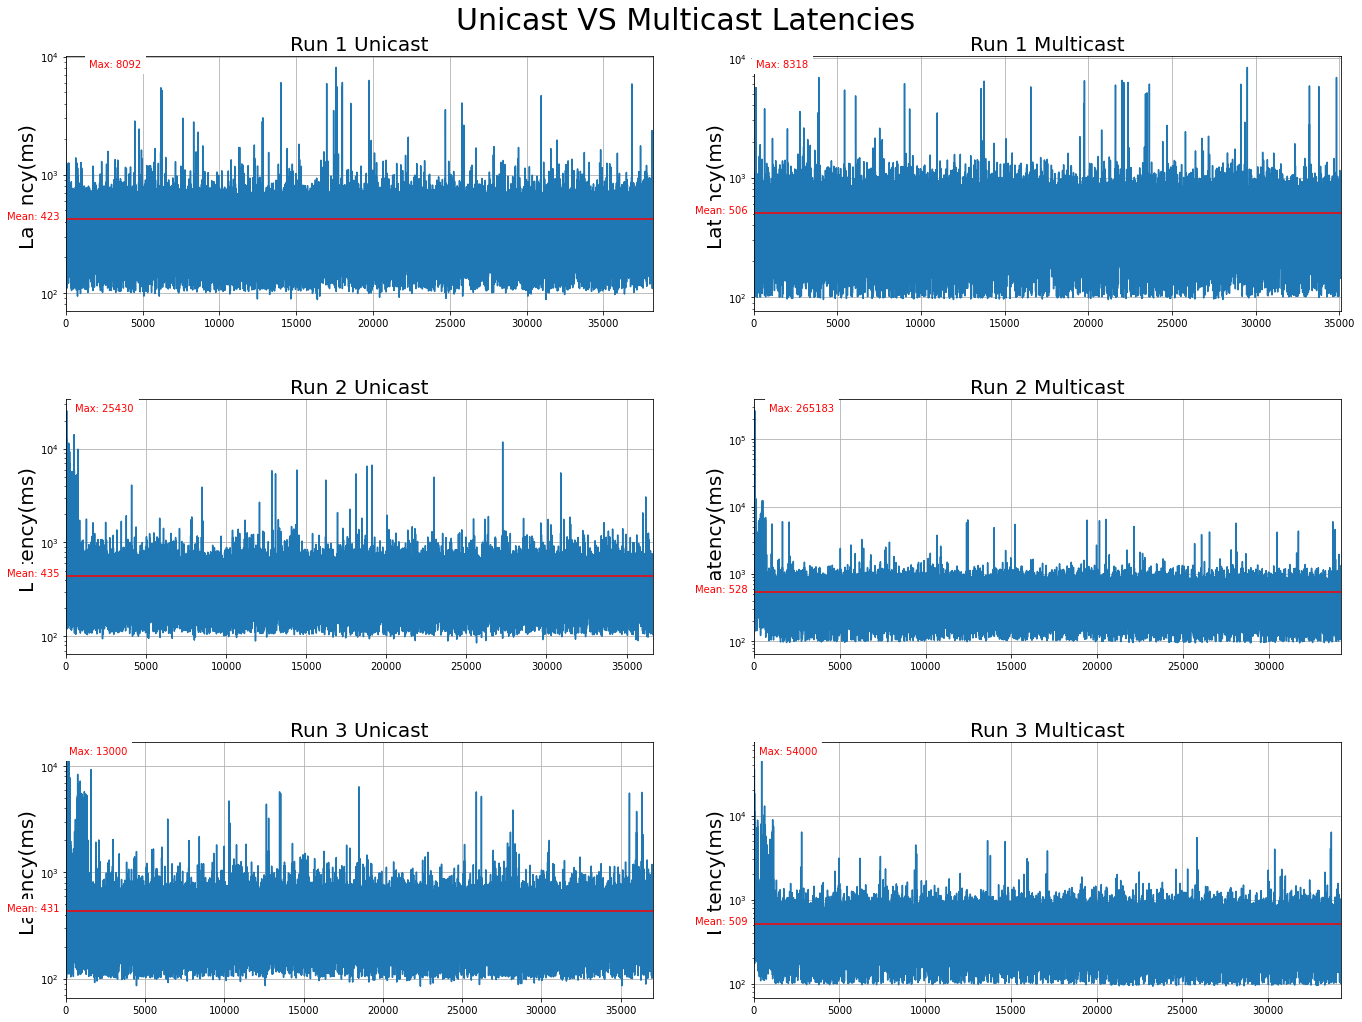

In [2]:
# Collect all files related to Set 1 - Base Case:
all_files = [file for file in get_files("Test Results") if ".csv" in file and "BC" in file and "clean_" in file]

unicast_files = [file for file in all_files if "Unicast" in file and "Rerun" in file]
multicast_files = [file for file in all_files if "Multicast" in file]

figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

def set_grid(df, index, title):
    axes[index].set_yscale('log')
    axes[index].axhline(df.mean(), color='red', xmin=0, xmax=len(df.index))
    axes[index].margins(x=0)
    axes[index].text(-(len(df.index) * 0.1), df.mean(), "Mean: " + str(int(df.mean())), color='r', size='medium', backgroundcolor='white')
    axes[index].set_ylabel('Latency(ms)', size=20)
    axes[index].set_title(title, size=20)
    axes[index].text(df.tolist().index(df.quantile(0.75)), df.max(), "Max: " + str(int(df.max())), color='r', size='medium', backgroundcolor='white')
    
    
def plot_test_type(files, run, index):
    lat_file = [file for file in files if "vm1" in file and current_run in file and "pub" in file][0]
    lat = pd.read_csv(lat_file)["Latency"]
    lat.plot(ax=axes[index], grid=True)
    if index == (run, 0):
        set_grid(lat, index, "Run " + str(run + 1) + " Unicast")
    else:
        set_grid(lat, index, "Run " + str(run + 1) + " Multicast")
    
for i in range(3):  # For each run
    current_run = "run_" + str(i + 1)
    
    plot_test_type(unicast_files, i, (i, 0))
    plot_test_type(multicast_files, i, (i, 1))    
    
plt.tight_layout(pad=5)
figure.suptitle("Unicast VS Multicast Latencies", size=30)


Below we plot the CDFs for each run too:

Text(0.5, 0.98, 'Unicast VS Multicast Latency CDFs')

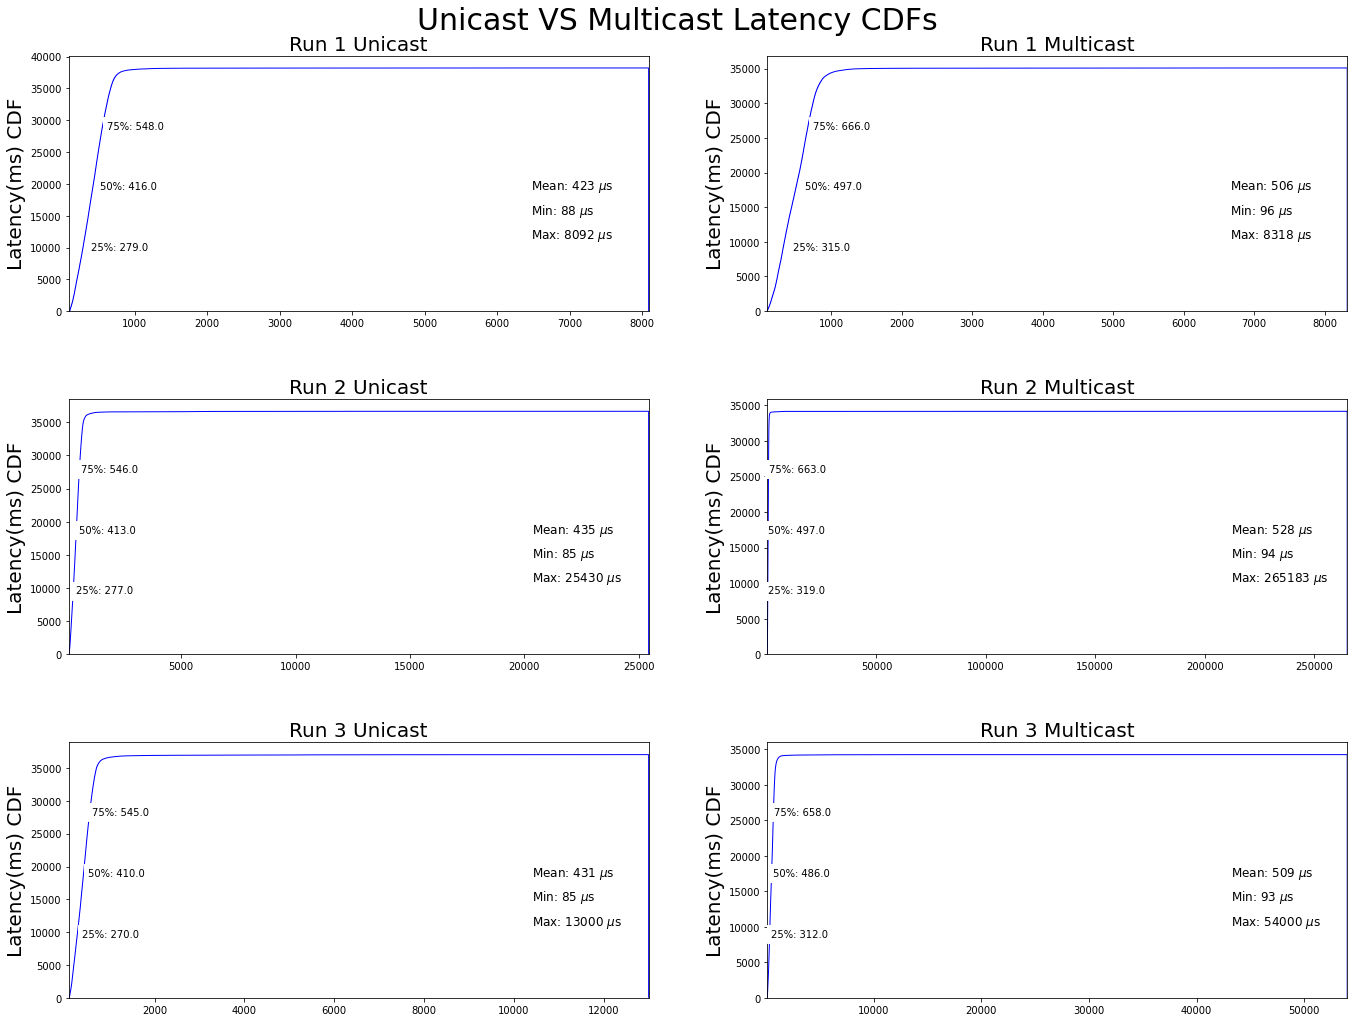

In [3]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

def plot_test_type(files, run, index):
    lat_file = [file for file in files if "vm1" in file and current_run in file and "pub" in file][0]
    df = pd.read_csv(lat_file)["Latency"]
    axes[index].hist(df, cumulative=True, histtype="step", color="b", bins=len(df.index))
    axes[index].margins(x=0)
    axes[index].set_ylabel('Latency(ms) CDF', size=20)
    if index == (run, 0):
        title = "Run " + str(run + 1) + " Unicast"
    else:
        title = "Run " + str(run + 1) + " Multicast"
    axes[index].set_title(title, size=20)
    axes[index].text(df.max() * 0.8, (len(df.index) * 0.5), "Mean: " + str(int(df.mean())) + " $\mu$s", size="large")
    axes[index].text(df.max() * 0.8, (len(df.index) * 0.4), "Min: " + str(int(df.min())) + " $\mu$s", size="large")
    axes[index].text(df.max() * 0.8, (len(df.index) * 0.3), "Max: " + str(int(df.max())) + " $\mu$s", size="large")
    axes[index].text(df.quantile(0.45), len(df.index) * 0.25, "25%: " + str(df.quantile(0.25)), size="medium", backgroundcolor="white")
    axes[index].text(df.quantile(0.7), len(df.index) / 2, "50%: " + str(df.quantile(0.5)), size="medium", backgroundcolor="white")
    axes[index].text(df.quantile(0.85), len(df.index) * 0.75, "75%: " + str(df.quantile(0.75)), size="medium", backgroundcolor="white")
    
for i in range(3):  # For each run
    current_run = "run_" + str(i + 1)
    
    plot_test_type(unicast_files, i, (i, 0))
    plot_test_type(multicast_files, i, (i, 1))
    
plt.tight_layout(pad=5)
figure.suptitle("Unicast VS Multicast Latency CDFs", size=30)

Taking the 3 runs and averaging them to compare unicast versus multicast:

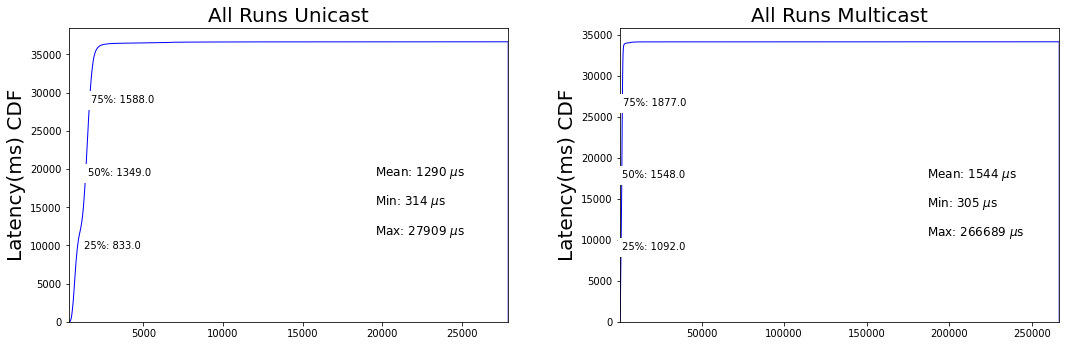

In [17]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

unicast_lat_files = [file for file in unicast_files if "vm1" in file and "pub" in file]

run1_u_lat_df = pd.read_csv(unicast_lat_files[0])["Latency"]
run2_u_lat_df = pd.read_csv(unicast_lat_files[1])["Latency"]
run3_u_lat_df = pd.read_csv(unicast_lat_files[2])["Latency"]

u_lat_df = run1_u_lat_df + run2_u_lat_df + run3_u_lat_df

index = 0

df = u_lat_df

axes[index].hist(df, cumulative=True, histtype="step", color="b", bins=len(df.index))
axes[index].margins(x=0)
axes[index].set_ylabel('Latency(ms) CDF', size=20)
title = "All Runs Unicast"
axes[index].set_title(title, size=20)
axes[index].text(df.max() * 0.7, (len(df.index) * 0.5), "Mean: " + str(int(df.mean())) + " $\mu$s", size="large")
axes[index].text(df.max() * 0.7, (len(df.index) * 0.4), "Min: " + str(int(df.min())) + " $\mu$s", size="large")
axes[index].text(df.max() * 0.7, (len(df.index) * 0.3), "Max: " + str(int(df.max())) + " $\mu$s", size="large")
axes[index].text(df.quantile(0.45), len(df.index) * 0.25, "25%: " + str(df.quantile(0.25)), size="medium", backgroundcolor="white")
axes[index].text(df.quantile(0.7), len(df.index) / 2, "50%: " + str(df.quantile(0.5)), size="medium", backgroundcolor="white")
axes[index].text(df.quantile(0.85), len(df.index) * 0.75, "75%: " + str(df.quantile(0.75)), size="medium", backgroundcolor="white")

multicast_lat_files = [file for file in multicast_files if "vm1" in file and "pub" in file]

run1_m_lat_df = pd.read_csv(multicast_lat_files[0])["Latency"]
run2_m_lat_df = pd.read_csv(multicast_lat_files[1])["Latency"]
run3_m_lat_df = pd.read_csv(multicast_lat_files[2])["Latency"]

m_lat_df = run1_m_lat_df + run2_m_lat_df + run3_m_lat_df

index = 1

df = m_lat_df

axes[index].hist(df, cumulative=True, histtype="step", color="b", bins=len(df.index))
axes[index].margins(x=0)
axes[index].set_ylabel('Latency(ms) CDF', size=20)
title = "All Runs Multicast"
axes[index].set_title(title, size=20)
axes[index].text(df.max() * 0.7, (len(df.index) * 0.5), "Mean: " + str(int(df.mean())) + " $\mu$s", size="large")
axes[index].text(df.max() * 0.7, (len(df.index) * 0.4), "Min: " + str(int(df.min())) + " $\mu$s", size="large")
axes[index].text(df.max() * 0.7, (len(df.index) * 0.3), "Max: " + str(int(df.max())) + " $\mu$s", size="large")
axes[index].text(df.quantile(0.45), len(df.index) * 0.25, "25%: " + str(df.quantile(0.25)), size="medium", backgroundcolor="white")
axes[index].text(df.quantile(0.7), len(df.index) / 2, "50%: " + str(df.quantile(0.5)), size="medium", backgroundcolor="white")
axes[index].text(df.quantile(0.85), len(df.index) * 0.75, "75%: " + str(df.quantile(0.75)), size="medium", backgroundcolor="white")

plt.tight_layout(pad=5)

In [22]:
mean_increase = int(((m_lat_df.mean() - u_lat_df.mean()) / u_lat_df.mean()) * 100)

print("Mean Increase: " + str(mean_increase) + "%")

Mean Increase: 19%

## Plotting the Throughput of Unicast vs Multicast


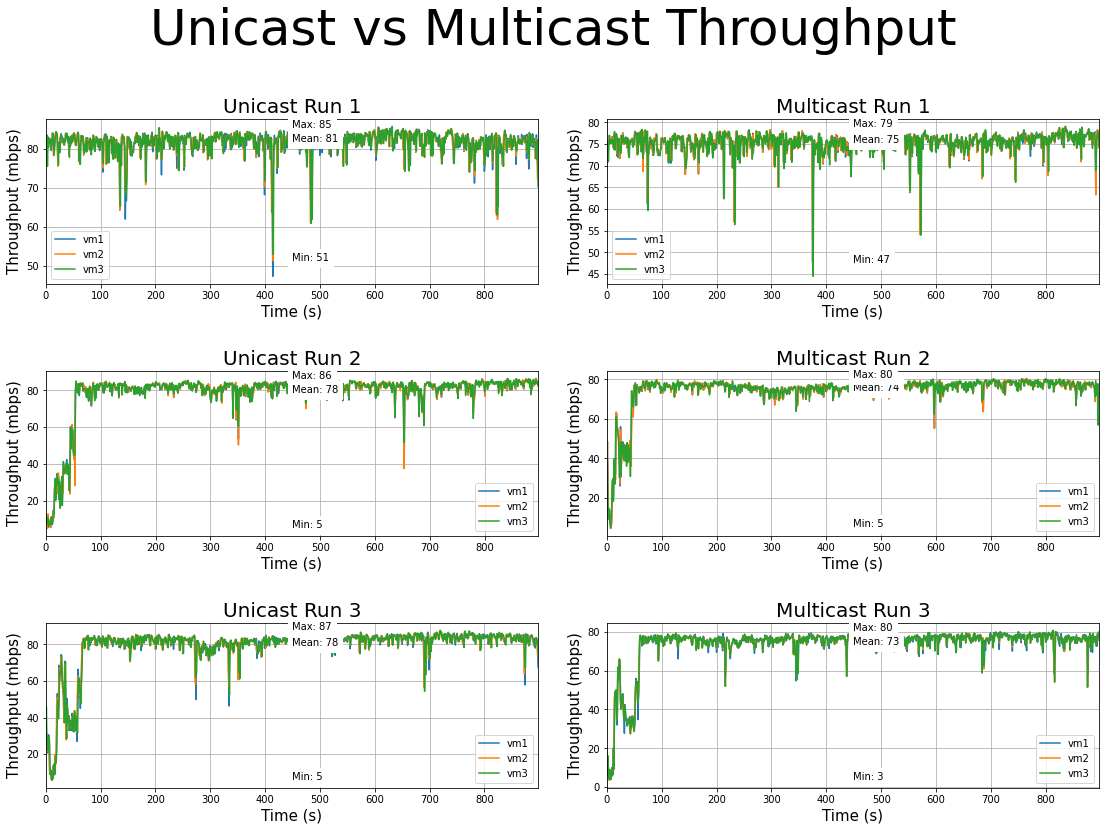

In [162]:
# Get unicast throughput files
unicast_throughput_files = [file for file in unicast_files if "sub" in file]
# Get multicast throughput files
multicast_throughput_files = [file for file in multicast_files if "sub" in file]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.suptitle("Unicast vs Multicast Throughput", size=50)

def plot_summary_data(df, index):
    mean_x = len(df.index) * 0.5
    mean_y = df.mean()
    axes[index].text(mean_x, mean_y, "Mean: " + str(int(df.mean())), backgroundcolor='white')
    
    max_x = len(df.index) * 0.5
    max_y = df.max()
    axes[index].text(max_x, max_y, "Max: " + str(int(df.max())), backgroundcolor='white')
    
    min_x = len(df.index) * 0.5
    min_y = df.min()
    axes[index].text(min_x, min_y, "Min: " + str(int(df.min())), backgroundcolor='white')

def plot_throughput_run(files, col, row, title):
    index = (row - 1, col)
    for file in files:
        file_index = files.index(file)
        df = pd.read_csv(file)["Throughput"]
        axes[index].plot(df)
        axes[index].set_title(title + " Run " + str(row), size=20)
        axes[index].set_ylabel("Throughput (mbps)", size=15)
        axes[index].set_xlabel("Time (s)", size=15)
        axes[index].set_xmargin(0)
        axes[index].grid(True)
        
        if file_index == 1:
            plot_summary_data(df, index)
    
def plot_throughput_col(files, col, title):
    run1_files = [file for file in files if "run_1" in file]
    run2_files = [file for file in files if "run_2" in file]
    run3_files = [file for file in files if "run_3" in file]
    
    plot_throughput_run(run1_files, col, 1, title)
    axes[0, col].legend(["vm1", "vm2", "vm3"])
    plot_throughput_run(run2_files, col, 2, title)
    axes[1, col].legend(["vm1", "vm2", "vm3"])
    plot_throughput_run(run3_files, col, 3, title)
    axes[2, col].legend(["vm1", "vm2", "vm3"])
    
plot_throughput_col(unicast_throughput_files, 0, "Unicast")
plot_throughput_col(multicast_throughput_files, 1, "Multicast")

plt.tight_layout(pad=3)